In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Building Blocks of a Decision-Tree

A decision-tree is a data-structure consisting of a hierarchy of individual units called nodes. A node is a point that involves either a question or a prediction.

The root is the node at which the decision-tree starts growing. It has no parent node and involves a question that gives rise to 2 children nodes through two branches. 

An internal node is a node that has a parent. It also involves a question that gives rise to 2 children nodes. 

Finally, a node that has no children is called a leaf. A leaf has one parent node and involves no questions. It's where a prediction is made.

When a classification tree is trained on a labeled dataset, the tree learns patterns from the features in such a way to produce the purest leafs. In other words the tree is trained in such a way so that, in each leaf, one class-label is predominant.

###  Information Gain (IG)

When an unconstrained tree is trained, the nodes are grown recursively; in other words, the obtention of an internal node or a leaf depends on the state of its predecessors. To produce the purest leafs possible, at each node, a tree asks a question involving one feature and a split-point. But how does it know which feature and which split-point to pick? It does so by maximizing Information gain!

The tree considers that every node contains information and aims at maximizing the Information Gain obtained after each split. Consider the case where a node with N samples is split into a left-node with Nleft samples and a right-node with Nright samples. If the information gain obtained by splitting a node is null, the node is declared a leaf. 

'What criterion is used to measure the impurity of a node?' 

There are different criteria you can use among which are the gini-index and entropy.



### Classification-tree

Given a labeled dataset, a classification tree learns a sequence of if-else questions about individual features in order to infer the labels. In contrast to linear models, trees are able to capture non-linear relationships between features and labels. In addition, trees don't require the features to be on the same scale through standardization for example.


#### Breast Cancer Dataset in 2D
To understand trees more concretely, we'll try to predict whether a tumor is malignant or benign in the Wisconsin Breast Cancer dataset.

In [2]:
df = pd.read_csv("wbc.csv")

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.shape

(569, 33)

In [5]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [6]:
df.describe(exclude="number")

,diagnosis
count,569
unique,2
top,B
freq,357


In [7]:
X = df.drop(['id', 'diagnosis','Unnamed: 32'], axis = 1)

In [8]:
y = df["diagnosis"]
y.unique()

array(['M', 'B'], dtype=object)

In order to obtain an unbiased estimate of a model's performance, you must evaluate it on an unseen test set. To do so, first import the functions train_test_split() from sklearn.model_selection then split the data into 80% train and 20% test using train_test_split(). Set the parameter stratify to y in order for the train and test sets to have the same proportion of class labels as the unsplit dataset. 

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

#### Classification-tree in scikit-learn

To understand the tree's predictions more concretely, we need to understand how it classifies instances in the feature-space.

####  Decision Regions

A classification-model divides the feature-space into regions where all instances in one region are assigned to only one class-label. These regions are known as decision-regions. Decision-regions are separated by surfaces called decision-boundaries. The  decision-boundary of a linear-classifier is a straight-line.

In contrast, a classification-tree produces rectangular decision-regions in the feature-space. This happens because at each split made by the tree, only one feature is involved.


Now that you know what a classification tree is, let's fit one with scikit-learn. First, import DecisionTreeClassifier from sklearn.tree. Also, and accuracy_score() from sklearn.metrics. 

In [11]:
# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier
# Import accuracy_score
from sklearn.metrics import accuracy_score

You can now use DecisionTreeClassifier() to instantiate a tree classifier, dt with a maximum depth of 6 by setting the parameter max_depth to 6 and set the parameter random_state to 1 for reproducibility.

In [12]:
# Instantiate dt_entropy, set 'entropy' as the information criterion
dt_gini = DecisionTreeClassifier(max_depth=6, criterion='gini', random_state=1)

Then call the fit method on dt and pass X_train and y_train. 

In [13]:
# Fit dt_entropy to the training set
dt_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, random_state=1)

To predict the labels of the test-set, call the predict method on dt. 

In [14]:
# Use dt_entropy to predict test set labels
y_pred= dt_gini.predict(X_test)

Finally print the accuracy of the test set using accuracy_score(). 

In [15]:
# Evaluate accuracy_entropy
accuracy_gini = accuracy_score(y_test, y_pred)

In [16]:
# Instantiate dt_entropy, set 'entropy' as the information criterion
dt_entropy = DecisionTreeClassifier(max_depth=6, criterion='entropy', random_state=1)

In [17]:
# Fit dt_entropy to the training set
dt_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=1)

In [18]:
# Use dt_entropy to predict test set labels
y_pred2= dt_entropy.predict(X_test)

In [19]:
# Evaluate accuracy_entropy
accuracy_entropy = accuracy_score(y_test, y_pred2)

In [20]:
# Print accuracy_entropy
print('Accuracy achieved by using entropy: ', accuracy_entropy)

# Print accuracy_gini
print('Accuracy achieved by using the gini index: ', accuracy_gini)

Accuracy achieved by using entropy:  0.9473684210526315
Accuracy achieved by using the gini index:  0.9473684210526315


In [21]:
# Import LogisticRegression from sklearn.linear_model
from sklearn.linear_model import LogisticRegression

# Instatiate logreg
logreg = LogisticRegression(random_state=1)

# Fit logreg to the training set
logreg.fit(X_train, y_train)

y_pred_log = logreg.predict(X_test)

# Evaluate accuracy
accuracy_log = accuracy_score(y_test, y_pred_log)

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
# Print accuracy_entropy
print('Accuracy achieved by using entropy: ', accuracy_entropy)

# Print accuracy_gini
print('Accuracy achieved by using the gini index: ', accuracy_gini)

# Print accuracy_gini
print('Accuracy achieved by using the logistic Regression: ', accuracy_log)

Accuracy achieved by using entropy:  0.9473684210526315
Accuracy achieved by using the gini index:  0.9473684210526315
Accuracy achieved by using the logistic Regression:  0.9473684210526315


### Tuning a CART's hyperparameters

To obtain a better performance, the hyperparameters of a machine learning should be tuned.

#### Hyperparameters

Machine learning models are characterized by parameters and hyperparameters. 

Parameters are learned from data through training; examples of parameters include the split-feature and the split-point of a node in a CART. 

Hyperparameters are not learned from data; they should be set prior to training. Examples of hyperparameters include the maximum-depth and the splitting-criterion of a CART.

#### What is hyperparameter tuning?

- Hyperparameter tuning consists of searching for the set of optimal hyperparameters for the learning algorithm. 

- The solution involves finding the set of optimal hyperparameters yielding an optimal model. 

- The optimal model yields an optimal score. 

- The score function measures the agreement between true labels and a model's predictions. In sklearn, it defaults to accuracy for classifiers and r-squared for regressors. 

- A model's generalization performance is evaluated using cross-validation.

#### Why tune hyperparameters?

A legitimate question that you may ask is: why bother tuning hyperparameters? 

Well, in scikit-learn, a model's default hyperparameters are not optimal for all problems. Hyperparameters should be tuned to obtain the best model performance.

#### Approaches to hyperparameter tuning

Now there are many approaches for hyperparameter tuning including: 

- Grid-search, 

- Random-search,

- Bayesian Optimization,

- Genetic Algorithms etc...

#### Grid search cross validation

In grid-search cross-validation, 

- first you manually set a grid of discrete hyperparameter values. 

- Then, you pick a metric for scoring model performance and you search exhaustively through the grid. 

- For each set of hyperparameters, you evaluate each model's score. 

- The optimal hyperparameters are those for which the model achieves the best cross-validation score. 

- Note that grid-search suffers from the curse of dimensionality, i.e the bigger the grid, the longer it takes to find the solution.


#### Grid search cross validation: example

Let's walk through a concrete example to understand this procedure. 

Consider the case of a CART where you search through the two-dimensional hyperparameter grid. The dimensions correspond to the CART's maximum-depth and the minimum-percentage of samples per leaf. For each combination of hyperparameters, the cross-validation score is evaluated using k-fold CV for example. Finally, the optimal hyperparameters correspond to the model achieving the best cross-validation score.

#### Inspecting the hyperparameters of a CART in sklearn

Let's now see how we can inspect the hyperparameters of a CART in scikit-learn. You can first instantiate a DecisionTreeClassifier dt 

In [24]:
# Instantiate a classification-tree 'dt'
dt = DecisionTreeClassifier(random_state=1) ## Weak estimator
# Fit 'bc' to the training set
dt.fit(X_train, y_train)

# Predict the test set labels
y_pred = dt.predict(X_test)

# Evaluate the accuracy on the test set 0f untuned DT
print('Accuracy Score of Untuned DT : {:.3f}'.format(accuracy_score(y_test, y_pred)*100))

Accuracy Score of Untuned DT : 94.737


Then, call dt's -dot-get_params() method. This prints out a dictionary where the keys are the hyperparameter names.

In [25]:
# Print out 'dt's hyperparameters
print(dt.get_params())

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 1, 'splitter': 'best'}


In the following, we'll only be optimizing max_depth, max_features and min_samples_leaf. Note that max_features is the number of features to consider when looking for the best split. When it's a float, it is interpreted as a percentage. 

#### Grid search CV in sklearn (Breast Cancer dataset)

Let's now tune dt on the wisconsin breast cancer dataset which is already loaded and split into 80%-train and 20%-test. First, import GridSearchCV from sklearn-dot-model_selection. 

In [26]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

Then, define a dictionary called params_dt containing the names of the hyperparameters to tune as keys and lists of hyperparameter-values as values.

In [27]:
# Define the grid of hyperparameters 'params_dt'
params_dt = {'max_depth': [5,6,7],'max_features': [0.6,0.7,0.8,0.9], 
             'min_samples_split':[3,4,5,6]
             }

Once done, instantiate a GridSearchCV object grid_dt by passing dt as an estimator and params_dt as param_grid. Also set scoring to accuracy and cv to 10 in order to use 10-fold stratified cross-validation for model evaluation. 

In [28]:
# Instantiate a 10-fold CV grid search object 'grid_dt'
grid_dt = GridSearchCV(estimator=dt, param_grid=params_dt, scoring='accuracy', cv=10, n_jobs=-1)

Finally, fit grid_dt to the training set.

In [29]:
# Fit 'grid_dt' to the training data
grid_dt.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [5, 6, 7],
                         'max_features': [0.6, 0.7, 0.8, 0.9],
                         'min_samples_split': [3, 4, 5, 6]},
             scoring='accuracy')

#### Extracting the best hyperparameters

After training grid_dt, the best set of hyperparameter-values can be extracted from the attribute -dot-best_params_ of grid_dt. Also, the best cross validation accuracy can be accessed through grid_dt's -dot-best_score_ attribute.

In [30]:
# Extract best hyperparameters from 'grid_dt'
best_hyperparams = grid_dt.best_params_
print('Best hyerparameters:\n', best_hyperparams)

Best hyerparameters:
 {'max_depth': 5, 'max_features': 0.6, 'min_samples_split': 4}


In [31]:
# Extract best CV score from 'grid_dt'
best_CV_score = grid_dt.best_score_
print('Best CV accuracy'.format(best_CV_score))

Best CV accuracy


In [32]:
best_CV_score

0.9540096618357488

#### Extracting the best estimator

Similarly, the best-model can be extracted using the -dot-best_estimator attribute. 

Note that this model is fitted on the whole training set because the refit parameter of GridSearchCV is set to True by default. 

In [33]:
# Extract best model from 'grid_dt'
best_model = grid_dt.best_estimator_

In [34]:
# Evaluate test set accuracy
test_acc = best_model.score(X_test,y_test)

In [36]:
# Evaluate the accuracy on the test set 0f untuned DT
print('Accuracy Score of Untuned DT : {:.3f}'.format(accuracy_score(y_test, y_pred)*100))

# Print test set accuracy of tuned DT
print("Accuracy Score of best model: {:.3f}".format(test_acc*100))

Accuracy Score of Untuned DT : 94.737
Accuracy Score of best model: 95.614


Finally, you can evaluate this model's test set accuracy using the score method. The result is about 95.6% while the score of an untuned CART is of 93.9%.

#### Extra (Plotting Decision Boundary)

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def plot_decision_boundaries(X, y, model_class, **model_params):
    """
    Function to plot the decision boundaries of a classification model.
    This uses just the first two columns of the data for fitting 
    the model as we need to find the predicted value for every point in 
    scatter plot.
    Arguments:
            X: Feature data as a NumPy-type array.
            y: Label data as a NumPy-type array.
            model_class: A Scikit-learn ML estimator class 
            e.g. GaussianNB (imported from sklearn.naive_bayes) or
            LogisticRegression (imported from sklearn.linear_model)
            **model_params: Model parameters to be passed on to the ML estimator
    
    Typical code example:
            plt.figure()
            plt.title("KNN decision boundary with neighbros: 5",fontsize=16)
            plot_decision_boundaries(X_train,y_train,KNeighborsClassifier,n_neighbors=5)
            plt.show()
    """
    try:
        X = np.array(X)
        y = np.array(y).flatten()
    except:
        print("Coercing input data to NumPy arrays failed")
    
    # Reduces to the first two columns of data
    reduced_data = X[:, :2]
    
    # Instantiate the model object
    model = model_class(**model_params)
    
    # Fits the model with the reduced data
    model.fit(reduced_data, y)

    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = .02     # point in the mesh [x_min, m_max]x[y_min, y_max].    

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    
    # Meshgrid creation
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh using the model.
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])    

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Predictions to obtain the classification results
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Plotting
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
    plt.xlabel('radius_mean',fontsize=15)
    plt.ylabel('concave points_mean',fontsize=15)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    return plt

In [38]:
new_df = df[['radius_mean','concave points_mean', "diagnosis"]]

In [39]:
X = new_df.drop("diagnosis", axis = 1)

In [40]:
label = []

for i in new_df["diagnosis"]:
    if i == "M":
        label.append(1)
    else:
        label.append(0)

In [41]:
new_df["labels"] = label

<ipython-input-41-c0a68a88a3ff>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["labels"] = label


In [42]:
new_df.head()

,radius_mean,concave points_mean,diagnosis,labels
0,17.99,0.14710,M,1
1,20.57,0.07017,M,1
2,19.69,0.12790,M,1
3,11.42,0.10520,M,1
4,20.29,0.10430,M,1


In [43]:
y = new_df["labels"]
y.unique()  ###  class 1 corresponds to a malignant tumor and class 0 corresponds to a benign tumor.

array([1, 0], dtype=int64)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

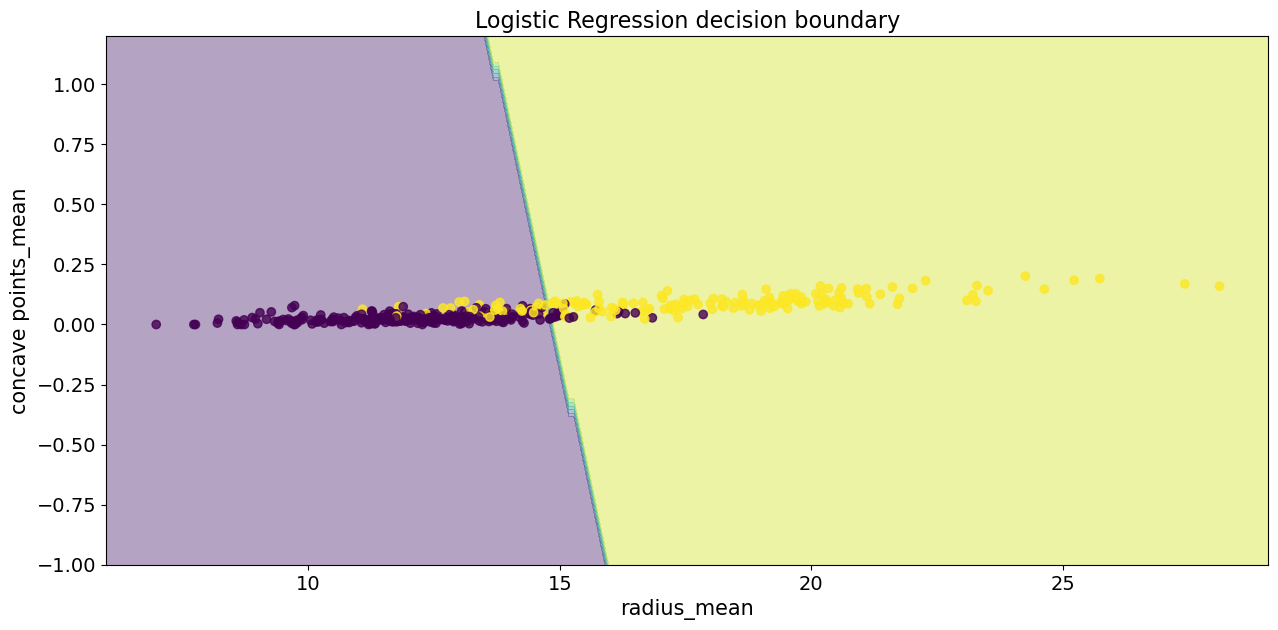

In [45]:
plt.figure(figsize = (15,7), dpi =100)
plt.title("Logistic Regression decision boundary", fontsize=16)
plot_decision_boundaries(X_train,y_train,LogisticRegression, random_state = 1)
plt.show()

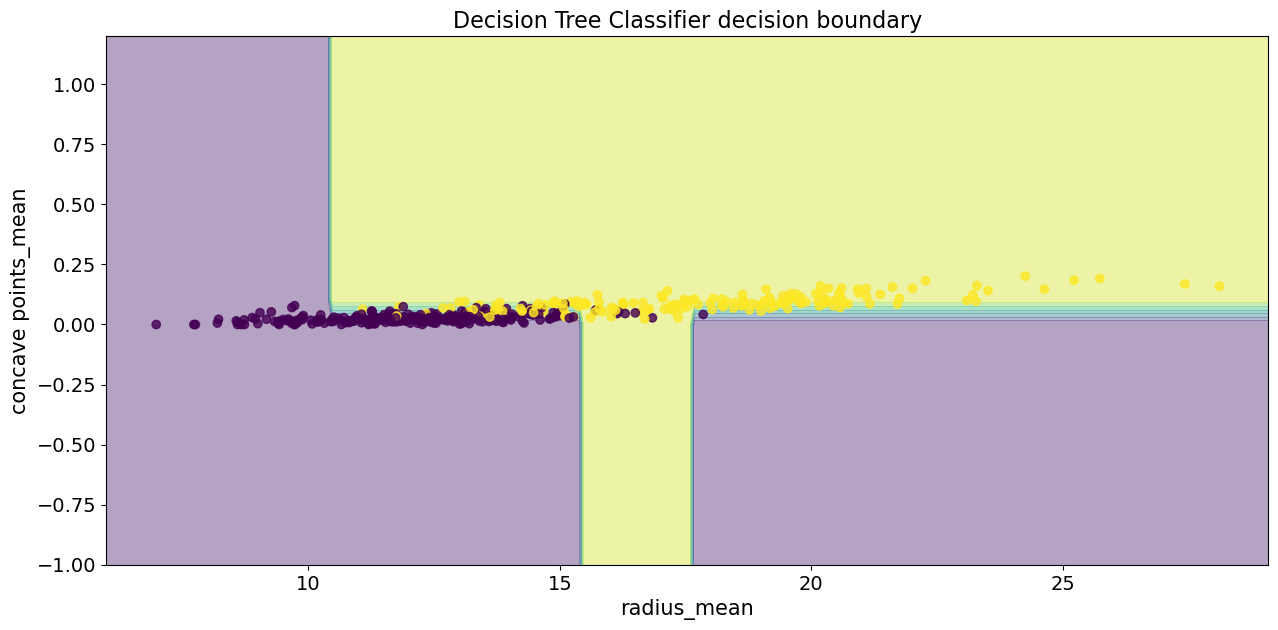

In [46]:
plt.figure(figsize = (15,7), dpi =100)
plt.title("Decision Tree Classifier decision boundary", fontsize=16)
plot_decision_boundaries(X_train,y_train,DecisionTreeClassifier,max_depth=6, criterion='gini', random_state=1)
plt.show()

Notice how the decision boundary produced by logistic regression is linear while the boundaries produced by the classification tree divide the feature space into rectangular regions.

#### Advantages of CARTs

CARTs(classification and regression Trees) present many advantages. For example 

- they are easy to understand and their output is easy to interpret. 

- In addition, CARTs are easy to use and their flexibility gives them an ability to describe nonlinear dependencies between features and labels. 

- Moreover, you don't need a lot of feature preprocessing to train a CART. In contrast to other models, you don't have to standardize or normalize features before feeding them to a CART.

